# 1. k-Nearest Neighbors

In this lab, we will be implementing k-Nearest Neighbors using Scikit-Learn.

### 1.1 Input Data

Importing standard modules and the dataset

In [1]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

The dataset is available is sklearn. So we have to import the dataset into our program and store it in a variable called cancer.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Let's explore the dataset to get some insight. ```cancer``` is a dictionary, thus we can explore the keys of this dictionary.

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

The keys allow us to access the data in the dictionary. For example, 'feature_names' allows us to display the feature names of the dataset. 'data': the data of the dataset; 'target': the classification target; 'feature_names': feature names of the dataset; 'DESCR': full description of the dataset.

We can use the ```describe``` and ```info``` methods to understand the dataset.

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We can display its feature names and the shape of the data.

In [5]:
print(cancer.feature_names)
print(cancer.data.shape) # display the size of the data

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


Now let's convert ```cancer.data``` into a Pandas DataFrame.

In [6]:
cancer_pd = pd.DataFrame(cancer.data)
cancer_pd.columns = cancer.feature_names
cancer_pd['target'] = cancer.target
cancer_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


As you can see there are 30 columns (feature variables) and 1 target variable. 
Let's biuld a predictive model to classify the dataset. We use two features only to predict the target variable. We split the dataset into training and test sets. A validation set is not created since we are building only one model.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
seed_num = 10
y = cancer_pd['target'].values
X = cancer_pd[['mean radius', 'mean compactness']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_test.shape)

(455, 2)
(114, 2)


Let's plot the distribution of ```X_train```

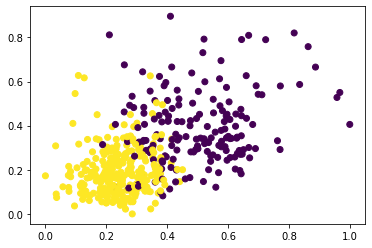

In [8]:
from matplotlib import pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

### 1.2 k-Nearest Neighbors

k-Nearest Neighbors classifer can be built by importing ```KNeighborsClassifier``` module. We set the following parameters: <ul> <li> ```n_neighbors``` is the number of neighbors to use. The default value is 5. </li> <li> ```metric``` is the distance metric to use for the tree.</li><li> The default metric is minkowski and with p=2 is equal to the standard Euclidean metric.</li></ul>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Let's evaluate the performance of the model by predicting the test set.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9035087719298246
[[31  8]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        39
           1       0.90      0.96      0.93        75

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



Let's find the best value of ```k```. We need to split the dataset into training, validation and test sets.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(364, 2)
(91, 2)
(114, 2)


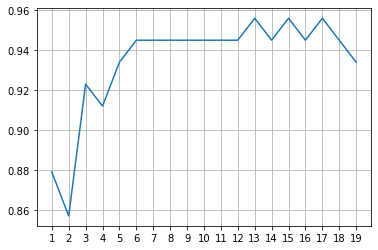

0.9560439560439561


In [12]:
scores = []
max_score = 0
best_k = 0
for k in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)

plt.plot(np.arange(1, 20), scores)
plt.xticks(np.arange(1, 20))
plt.grid()
plt.show()
print(max(scores))

In [13]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9385964912280702
[[35  4]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.95      0.96      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



We can also determine the best value of ```k``` using cross validation. In this case, we split the dataset into training and test sets. Then we use ```cross_val_score``` to determine the ```k``` parameter. The training set will be partitioned into ```cv``` parts.

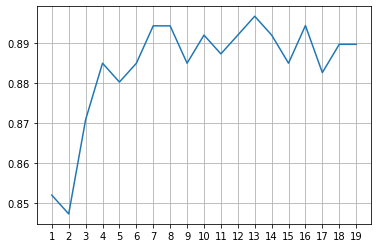

0.8966347469220246


In [14]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed_num)

scores = []
max_score = 0
best_k = 0
for k in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = cross_val_score(model_knn, X_train, y_train, cv=5)
    score = np.mean(score)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)

plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print(max(scores))

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9230769230769231
[[46  6]
 [ 5 86]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        52
           1       0.93      0.95      0.94        91

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



Let's plot the decision boundary of the k-Neighbor classifier.

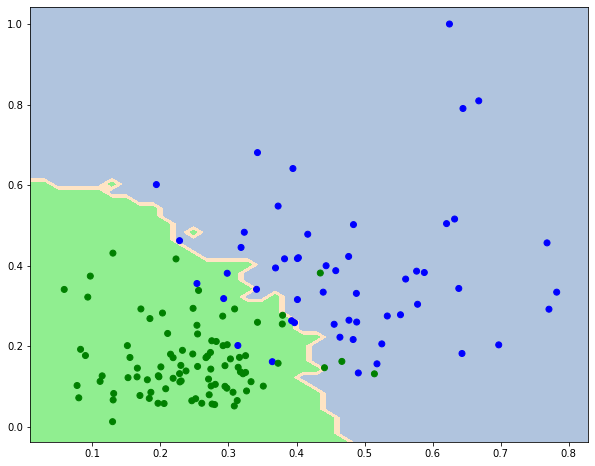

In [16]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['lightsteelblue', 'bisque', 'lightgreen'])
cmap_points = ListedColormap(['blue', 'orange', 'green'])
offset = 0.05
step = 0.02
x1_min, x1_max = X_test[:, 0].min() - offset, X_test[:,0].max() + offset
x2_min, x2_max = X_test[:, 1].min() - offset, X_test[:,1].max() + offset
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
Z = model_knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.figure(figsize=(10,8))
plt.contourf(xx1, xx2, Z, cmap=cmap_regions)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_points)